# Writing data to and reading data from a Database using Python

## Libraries and settings

In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

C:\Users\n-win\Desktop\ZHAW\Classes\Data Analytics\data_analytics\Week_02


## Create sqlite data base

In [2]:
# Create data base
conn = sqlite3.connect('apartment_database.db') 
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

apartment_database.db


## Create SQL-table in the database

In [3]:
cursor.execute('''CREATE TABLE IF NOT EXISTS apartments_table (OrderId VARCHAR(50),
                                                               Adress VARCHAR(200),
                                                               Rooms DECIMAL(8,2),
                                                               Area INT(8),
                                                               Price DECIMAL(8,2))''')
# Confirm changes to the table
conn.commit()

## Read data from file to data frame

In [4]:
df = pd.read_csv('Solution/apartments_data_prepared.csv',
                 sep=',',
                 encoding='utf-8')[['web-scraper-order', 'address_raw', 'rooms', 'area', 'price']]
print(df.shape)
df.head(5)

(1008, 5)


,web-scraper-order,address_raw,rooms,area,price
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,1441.0
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,1850.0
2,1693998201-3,"Cramerstrasse 8-12, 8004 Zürich, ZH",NaN,NaN,2686.0
3,1693998201-4,"Cramerstrasse 8-12, 8004 Zürich, ZH",2.0,54.0,4853.0
4,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,4335.0


## Write data to the SQL-table in data base

In [5]:
df.to_sql(name = 'apartments_table',
          con = conn,
          index = False,
          if_exists = 'replace')

1008

## Query the SQL-table

In [6]:
# Query the SQL-table
cursor.execute('''SELECT *
               FROM apartments_table
               WHERE rooms >=1''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Address','Rooms','Area','Price'])    
df

,OrderId,Address,Rooms,Area,Price
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,1441.0
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,1850.0
2,1693998201-4,"Cramerstrasse 8-12, 8004 Zürich, ZH",2.0,54.0,4853.0
3,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,4335.0
4,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",2.0,32.0,3515.0
...,...,...,...,...,...
958,1693998381-1004,"Hölderlinstrasse 12, 8032 Zürich, ZH",3.5,82.0,2830.0
959,1693998381-1005,"Hegifeldstrasse 70, 8404 Reutlingen (Winterthu...",4.0,73.0,1713.0
960,1693998381-1006,"Holzmoosrütisteig 2b, 8820 Wädenswil, ZH",4.5,110.0,3500.0
961,1693998381-1007,"Vogelbuckstrasse 25, 8307 Effretikon, ZH",3.0,68.0,1650.0


## Plot histogramm of rental prices

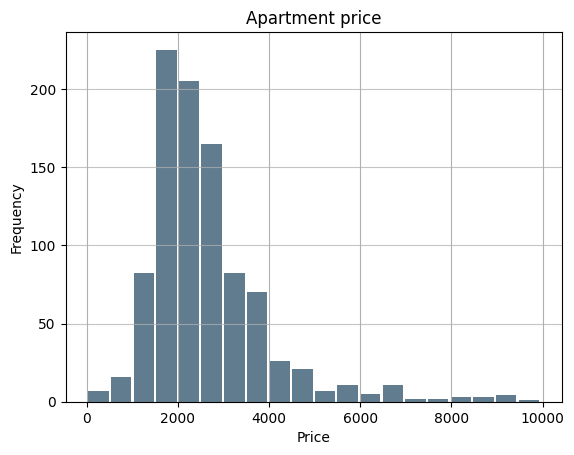

In [7]:
df.Price.plot.hist(grid=True, 
                   bins=20, 
                   rwidth=0.9,
                   color='#607c8e')
plt.title('Apartment price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

## Additional SQL-queries

### Write an SQL-query to filter all apartments with >= 4.0 rooms and where the area is >= 100m2.

In [16]:
cursor.execute('''SELECT *
                  FROM apartments_table
                  WHERE rooms >=4.0 AND area >=100''')

pd.DataFrame(cursor.fetchall(), columns=['OrderId','Address','Rooms','Area','Price'])

,OrderId,Address,Rooms,Area,Price
0,1693998205-26,"Frowiesstrasse 36, 8344 Bäretswil, ZH",5.5,140.0,2750.0
1,1693998205-27,"Kanzleistrasse 15, 8418 Schlatt ZH, ZH",4.5,104.0,2700.0
2,1693998205-29,"Bolletweg 14, 8934 Knonau, ZH",5.5,150.0,3390.0
3,1693998205-31,"Adlergass 6, 8805 Richterswil, ZH",5.5,165.0,NaN
4,1693998205-33,"Haldenstrasse 67, 8602 Wangen b. Dübendorf, ZH",4.5,118.0,3390.0
...,...,...,...,...,...
234,1693998381-998,"Tösstalstrasse 12, 8492 Wila, ZH",4.5,109.0,1980.0
235,1693998381-999,"Murzlenstrasse 66, 8166 Niederweningen, ZH",4.5,111.0,2700.0
236,1693998381-1001,"Murzlenstrasse 66, 8166 Niederweningen, ZH",4.5,111.0,2800.0
237,1693998381-1006,"Holzmoosrütisteig 2b, 8820 Wädenswil, ZH",4.5,110.0,3500.0


### Write an SQL-query to calculate the average area per room size.

In [18]:
cursor.execute('''
    SELECT rooms, AVG(area) AS average_area
    FROM apartments_table
    GROUP BY rooms
    ORDER BY rooms
''')

pd.DataFrame(cursor.fetchall(), columns=['Rooms', 'AverageArea'])

,Rooms,AverageArea
0,NaN,NaN
1,1.0,32.092593
2,1.5,35.526316
3,2.0,54.428571
4,2.5,67.317881
5,3.0,68.980392
6,3.5,89.858974
7,4.0,96.129032
8,4.5,114.779661
9,5.0,110.000000


## Close db connection (if open)

In [19]:
# Close db connection (if open)
try:
    if check_conn(conn):
        conn.close()
    else:
        pass
except:
    pass

# Status (True = open, False = closed)
print(check_conn(conn))

False


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [20]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2025-11-08 01:39:14
Python Version: 3.10.5
-----------------------------------
